In [74]:
import cenpy
import pandas as pd

In [89]:
gdfs = []
years = [2015, 2019]
for year in years:
    chi = cenpy.products.ACS(year).from_place('Chicago, IL', variables= ['B01003_001', 'B19013_001E', 'B25077_001E',
                                                'B03002_012E','B02008_001E', 'B02011_001E', 'B02009_001E',
                                                 'B17001_002E'])
    chi['year'] = year
    gdfs.append(chi)

chi_gdf = pd.concat(gdfs)
acs_variables = {
'B01003_001E' : 'total_pop',
'B19013_001E' : 'median_household_income',
'B25077_001E' : 'median_home_value',
'B03002_012E' : 'n_hispanic',
'B02008_001E' : 'n_white',
'B02009_001E' : 'n_black',
'B02011_001E' : 'n_asian',
'B17001_002E' : 'n_poverty'}
chi_gdf.rename(columns=acs_variables, inplace=True)

/home/andrew/anaconda3/envs/eats/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Chicago, IL to Chicago city within layer Incorporated Places


/home/andrew/anaconda3/envs/eats/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_447640/2187600959.py:4: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  chi = cenpy.products.ACS(year).from_place('Chicago, IL', variables= ['B01003_001', 'B19013_001E', 'B25077_001E',
/home/andrew/anaconda3/envs/eats/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/s

Matched: Chicago, IL to Chicago city within layer Incorporated Places


/home/andrew/anaconda3/envs/eats/lib/python3.10/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_447640/2187600959.py:4: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  chi = cenpy.products.ACS(year).from_place('Chicago, IL', variables= ['B01003_001', 'B19013_001E', 'B25077_001E',


AttributeError: 'GeoDataFrame' object has no attribute 'tot_pop'

In [104]:
chi_gdf['p_poverty'] = chi_gdf.n_poverty/chi_gdf.total_pop
chi_gdf['p_black'] = chi_gdf.n_black/chi_gdf.total_pop
chi_gdf['p_white'] = chi_gdf.n_white/chi_gdf.total_pop
chi_gdf['p_hispanic'] = chi_gdf.n_hispanic/chi_gdf.total_pop
chi_gdf['p_asian'] = chi_gdf.n_asian/chi_gdf.total_pop

<AxesSubplot:>

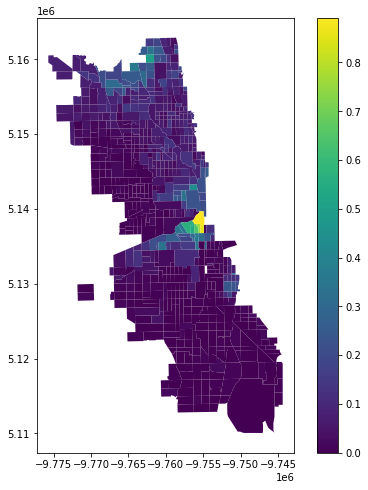

In [105]:
chi_gdf[chi_gdf.year == 2015].plot('p_asian', figsize = (8,8), legend=True)

<AxesSubplot:>

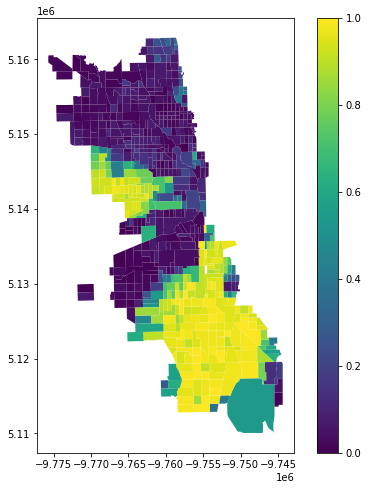

In [108]:
chi_gdf[chi_gdf.year == 2019].plot('p_black', figsize = (8,8), legend=True)